In [250]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import mean
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import statistics

In [251]:
#TODO:
#Step1 - Means computation 
#Step2- Finding SW and SB
#Step3- Finding W
#Step4- Projecting points onto W
#Step5- Plotting Gaussian curves for finding threshold
#Plots

In [252]:
#Creating 2d dataset
df1 =pd.read_csv("a1_d1.csv",encoding='iso-8859-1',header=None)
df1.columns=['x1','x2','y']
pos_ind=df1[df1['y']==1].index.tolist()
neg_ind=df1[df1['y']==0].index.tolist()
pos_df=df1.iloc[pos_ind,:]
neg_df=df1.iloc[neg_ind,:]
pos_list_x1=pos_df['x1'].tolist()
pos_list_x2=pos_df['x2'].tolist()
neg_list_x1=neg_df['x1'].tolist()
neg_list_x2=neg_df['x2'].tolist()

In [253]:
#Step 1
# Generating m1 and m2
m1=[np.mean(pos_list_x1),np.mean(pos_list_x2)]
m2=[np.mean(neg_list_x1),np.mean(neg_list_x2)]
m1=np.array(m1)
m2=np.array(m2)
m1=m1[:,None]
m2=m2[:,None]

In [254]:
#Step2- Finding SW and SB

#converting dataframe1 to numpy array
nparr=df1.to_numpy()

X=nparr[:,0:2]
Y=nparr[:,2:3]

#Initialising Sw with zero
Sw=np.array(np.zeros((len(X[0]) , len(X[0]))))

#compute Sw
for i in range(0,len(X)):
    xn=X[i]
    xn=xn[:,None]
    #positive class  
    if(Y[i] == 1) :
        temp = (xn-m1).dot((xn-m1).T)
    #negative class
    elif(Y[i]== 0) :  
        temp = (xn-m2).dot((xn-m2).T)
    Sw+=temp

#compute Sb
Sb = (m2-m1).dot((m2-m1).T)

#Computing Sw inverse
Sw_inv= np.linalg.inv(Sw)

In [255]:
#Step 3- Calculation of w
#w is propotional to (Sw inverse * (m1-m2))
W=Sw_inv.dot(m2-m1)

In [256]:
#Step 4 - Projection onto w
#Projecting onto 1-dimension
X_1d=[]
for i in range(0,len(X)):
    xn = X[i]
    xn = xn[:,None]
    projection = W.T.dot(X[i])
    X_1d.append(float(projection))

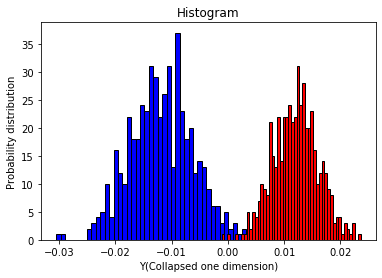

In [257]:

# matplotlib histogram
p_ind=[index for index, element in enumerate(Y) if element == 1]
n_ind=[index for index, element in enumerate(Y) if element == 0]

pos_points=[X_1d[i] for i in p_ind]
neg_points=[X_1d[i] for i in n_ind]
sig1=statistics.stdev(pos_points)
mu1=mean(pos_points)
sig2=statistics.stdev(neg_points)
mu2=mean(neg_points)

plt.hist(pos_points, color = 'blue', edgecolor = 'black',
         bins = int(50))
plt.hist(neg_points, color = 'red', edgecolor = 'black',
         bins = int(50))         
# Add labels
plt.title('Histogram')
plt.xlabel('Y(Collapsed one dimension)')
plt.ylabel('Probability distribution')

In [258]:
#Calculating Fisher's LD
# Equating both the normal curves and finding the intersection point by solving the resulting quadratic equation
def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

#Roots of the solution of a quadratic equation 
result = solve(mu1,mu2,sig1,sig2)

discriminant = 0
greater_mean=max(mu1,mu2)
lesser_mean=min(mu1,mu2)

#if there is one intersection point 
if (len(result)==1):
    discriminant=result[0]
#ensure that the intersection point we choose lies between the means of the two gaussian curves   
elif (result[0] >=lesser_mean and result[0]<=greater_mean):
    discriminant = result[0]
elif (result[1] >=lesser_mean and result[1]<=greater_mean):
    discriminant = result[1]


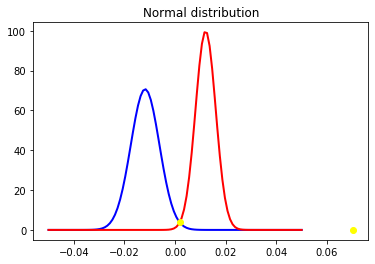

In [259]:
#Step5- Plotting Gaussian curves for finding threshold
# Fit a normal distribution to the data:
mu1, std1 = norm.fit(pos_points)
mu2, std2 = norm.fit(neg_points)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(-0.05, 0.05, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p1, 'k', linewidth=2,c='blue')
plt.plot(x, p2, 'k', linewidth=2,c='red')
plt.plot(result,norm.pdf(result,mu2,std2),'o',c='yellow')

title = "Normal distribution"
plt.title(title)

plt.show()

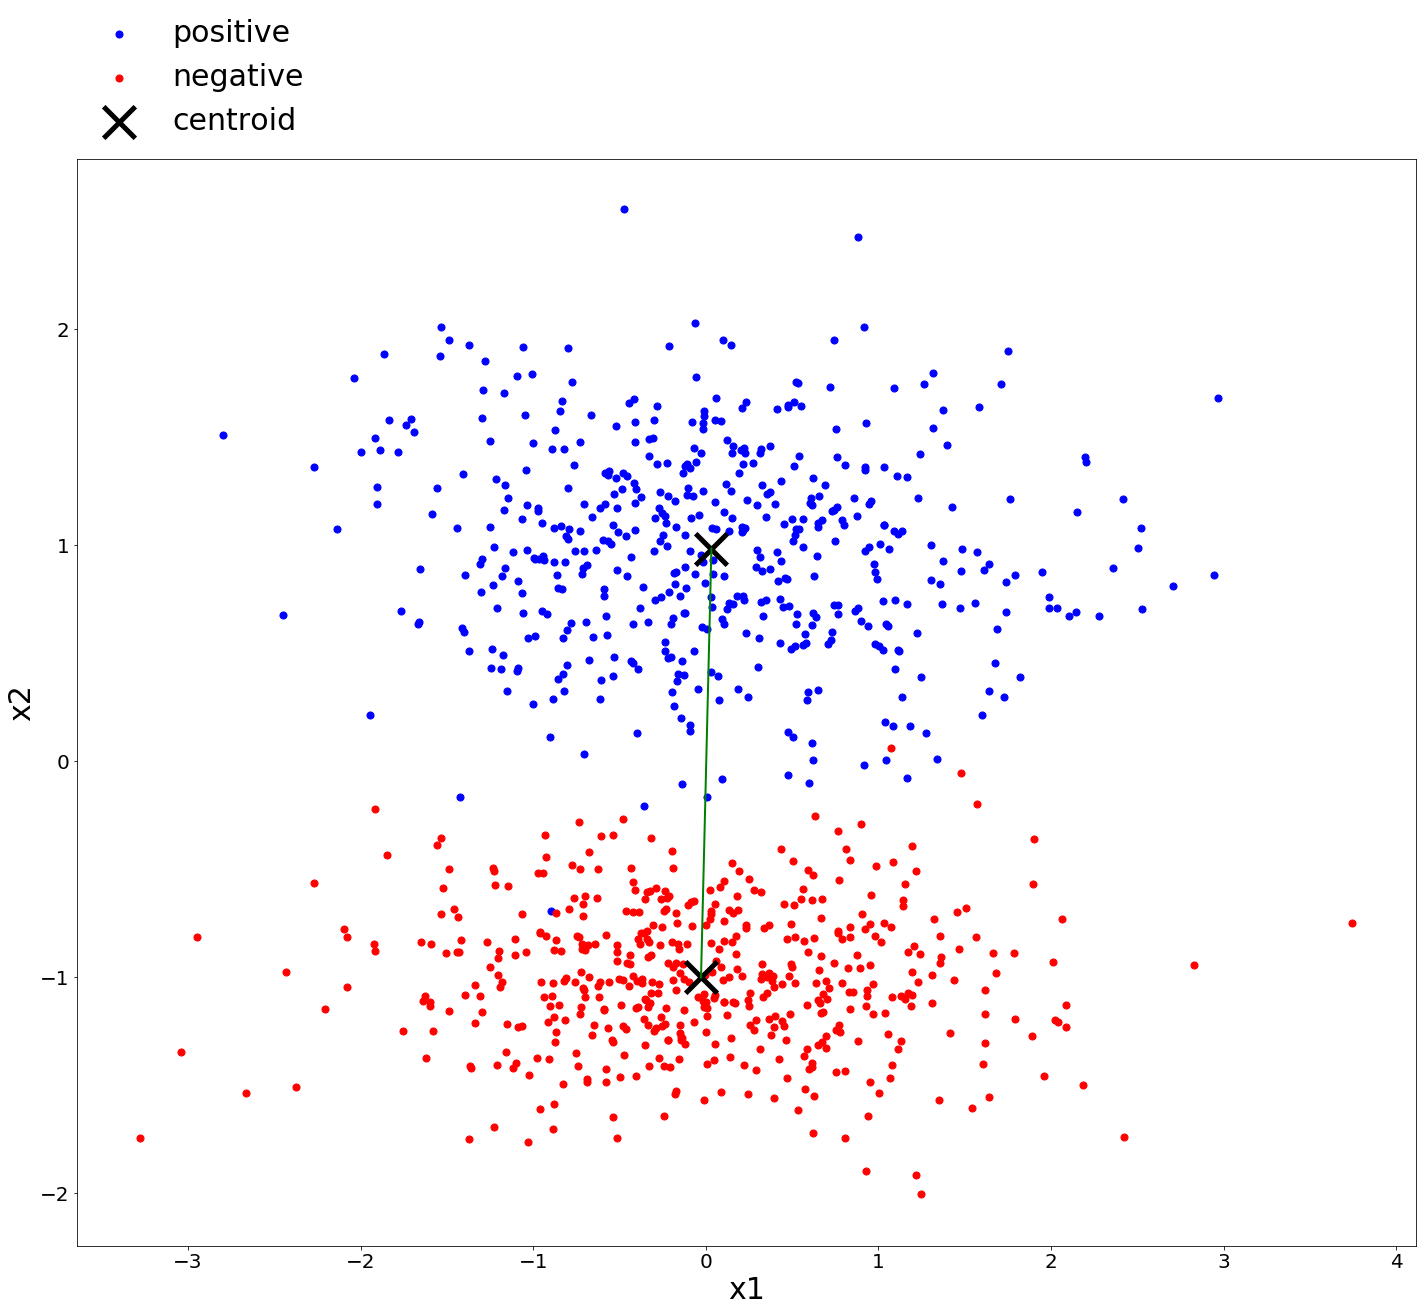

In [260]:
#Initail plot with means
fig, ax = plt.subplots()
fig.set_size_inches(24, 20)

color=['blue','red','black']
labels=['positive','negative','centroid']


plt.scatter(pos_list_x1,pos_list_x2,s=50,c=color[0],label=labels[0])#Plot all positive datapoints    
plt.scatter(neg_list_x1,neg_list_x2,s=50,c=color[1],label=labels[1])#Plot all positive datapoints    
plt.scatter(mean(pos_list_x1),mean(pos_list_x2),marker='x',linewidth=5,s=1000,c=color[2],label=labels[2])#Plot centroid of positive datapoints
plt.scatter(mean(neg_list_x1),mean(neg_list_x2),marker='x',linewidth=5,s=1000,c=color[2])#Plot centroid of negative datapoints

plt.plot([mean(pos_list_x1),mean(neg_list_x1)],[mean(pos_list_x2),mean(neg_list_x2)],linewidth=2,c='green')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('x1',fontsize=30)
plt.ylabel('x2',fontsize=30)
plt.legend()
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=1,borderaxespad=0, frameon=False,fontsize=30)

plt.show()    

In [262]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def f_score_metric(actual,predicted):
    true_pos=0
    true_neg=0
    false_pos=0
    false_neg=0
    for i in range(len(actual)):
        if actual[i] == predicted[i] and predicted[i]==1:#true pos
            true_pos += 1
        elif actual[i] == predicted[i] and predicted[i]==0:#true neg
            true_neg += 1
        elif actual[i] ==0 and predicted[i]==1:#false pos
            false_pos+= 1
        else:
            false_neg+=1
    precision =true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score=2*precision*recall/(precision+recall)
    return f_score
#predicted
pred=[]
for i in range(0,len(X_1d)):
    if X_1d[i]<=discriminant :
        pred.append(1)
    else:
        pred.append(0)
actual=[]

for ele in Y:
    actual.append(int(ele[0]))
print(accuracy_metric(actual,pred))
print(f_score_metric(actual,pred))

99.3
0.9929929929929929


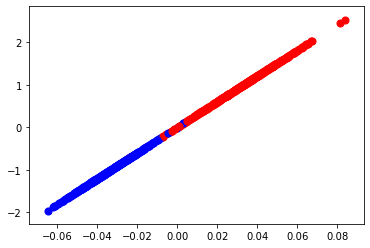

In [263]:
#Projecting onto vecto w
X_1d=[]# Points projected onto one dimension
mod_w=np.linalg.norm(W) #mod of w
w2=mod_w ** 2

for i in range(0,len(X)):
    xn = X[i]
    yn=Y[i]
    xn = xn[:,None]
    
    projection = W.T.dot(X[i])   
    point= (projection/w2)* W
    if(yn==0):
        plt.scatter(point[0],point[1], s=50,c=color[0])
    elif (yn==1):
        plt.scatter(point[0],point[1], s=50,c=color[1])


    

In [264]:
#3d dataset

In [265]:
df2 =pd.read_csv("a1_d2.csv",encoding='iso-8859-1',header=None)#3d dataset
df2.columns=['x1','x2','x3','y']

In [266]:
pos_ind=df2[df2['y']==1].index.tolist()
neg_ind=df2[df2['y']==0].index.tolist()
pos_df=df2.iloc[pos_ind,:]
neg_df=df2.iloc[neg_ind,:]
pos_list_x1=pos_df['x1'].tolist()
pos_list_x2=pos_df['x2'].tolist()
pos_list_x3=pos_df['x3'].tolist()
neg_list_x1=neg_df['x1'].tolist()
neg_list_x2=neg_df['x2'].tolist()
neg_list_x3=neg_df['x3'].tolist()

In [267]:
#Step 1
# Generating m1 and m2
m1=[np.mean(pos_list_x1),np.mean(pos_list_x2),np.mean(pos_list_x3)]
m2=[np.mean(neg_list_x1),np.mean(neg_list_x2),np.mean(neg_list_x3)]
m1=np.array(m1)
m2=np.array(m2)
m1=m1[:,None]
m2=m2[:,None]

In [268]:
nparr=df2.to_numpy()
#print(nparr.shape)
X=nparr[:,0:3]
Y=nparr[:,3:4]
#print(Y.shape)
Sw=np.array(np.zeros((len(X[0]) , len(X[0]))))

#compute Sw
for i in range(0,len(X)):
    xn=X[i]
    #print(xn)
    xn=xn[:,None]
    #print(xn)    
    if(Y[i] == 1) : #positive class
        temp = (xn-m1).dot((xn-m1).T)
    elif(Y[i]== 0) : #negative class 
        temp = (xn-m2).dot((xn-m2).T)
    Sw+=temp

#compute Sb
Sb = (m2-m1).dot((m2-m1).T)

Sw_inv= np.linalg.inv(Sw)

W=Sw_inv.dot(m2-m1)

#Projecting onto 1-dimension
X_1d=[]# Points projected onto one dimension
print(W)
for i in range(0,len(X)):
    xn = X[i]
    xn = xn[:,None]
    projection = W.T.dot(X[i])
    X_1d.append(float(projection))

#print(X_1d)

[[ 0.00014845]
 [ 0.0004129 ]
 [-0.02263587]]


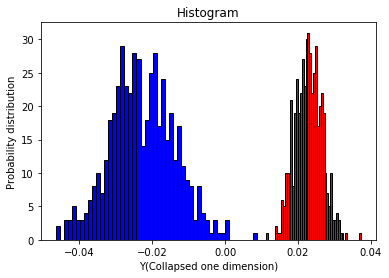

In [269]:
# matplotlib histogram
p_ind=[index for index, element in enumerate(Y) if element == 1]
n_ind=[index for index, element in enumerate(Y) if element == 0]

pos_points=[X_1d[i] for i in p_ind]
neg_points=[X_1d[i] for i in n_ind]
sig1=statistics.stdev(pos_points)
mu1=mean(pos_points)
sig2=statistics.stdev(neg_points)
mu2=mean(neg_points)

plt.hist(pos_points, color = 'blue', edgecolor = 'black',
         bins = int(50))
plt.hist(neg_points, color = 'red', edgecolor = 'black',
         bins = int(50))         
# Add labels
plt.title('Histogram')
plt.xlabel('Y(Collapsed one dimension)')
plt.ylabel('Probability distribution')

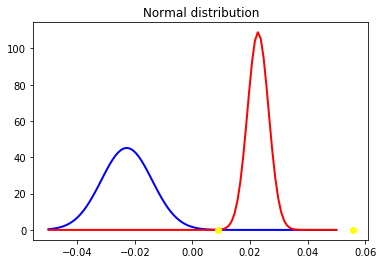

In [270]:
def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

result = solve(mu1,mu2,sig1,sig2)


# Fit a normal distribution to the data:
mu1, std1 = norm.fit(pos_points)
mu2, std2 = norm.fit(neg_points)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(-0.05, 0.05, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p1, 'k', linewidth=2,c='blue')
plt.plot(x, p2, 'k', linewidth=2,c='red')
plt.plot(result,norm.pdf(result,mu1,std1),'o',c='yellow')

title = "Normal distribution"
plt.title(title)

plt.show()

In [271]:
import numpy as np

def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

result = solve(mu1,mu2,sig1,sig2)

discriminant = 0
greater_mean=max(mu1,mu2)
lesser_mean=min(mu1,mu2)
if (len(result)==1):
    discriminant=result[0]
elif (result[0] >=lesser_mean and result[0]<=greater_mean):
    discriminant = result[0]
elif (result[1] >=lesser_mean and result[1]<=greater_mean):
    discriminant = result[1]

In [272]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def f_score_metric(actual,predicted):
    true_pos=0
    true_neg=0
    false_pos=0
    false_neg=0
    for i in range(len(actual)):
        if actual[i] == predicted[i] and predicted[i]==1:#true pos
            true_pos += 1
        elif actual[i] == predicted[i] and predicted[i]==0:#true neg
            true_neg += 1
        elif actual[i] ==0 and predicted[i]==1:#false pos
            false_pos+= 1
        else:
            false_neg+=1
    precision =true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score=2*precision*recall/(precision+recall)
    return f_score

#predicted
pred=[]
for i in range(0,len(X_1d)):
    if X_1d[i]<=discriminant :
        pred.append(1)
    else:
        pred.append(0)
actual=[]
#print(actual)
for ele in Y:
    actual.append(int(ele[0]))
print(accuracy_metric(actual,pred))
print(f_score_metric(actual,pred))

100.0
1.0


In [273]:
def f_score_metric(actual,predicted):
    true_pos=0
    true_neg=0
    false_pos=0
    false_neg=0
    for i in range(len(actual)):
        if actual[i] == predicted[i] and predicted[i]==1:#true pos
            true_pos += 1
        elif actual[i] == predicted[i] and predicted[i]==0:#true neg
            true_neg += 1
        elif actual[i] ==0 and predicted[i]==1:#false pos
            false_pos+= 1
        else:
            false_neg+=1
    precision =true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score=2*precision*recall/(precision+recall)
    return f_score

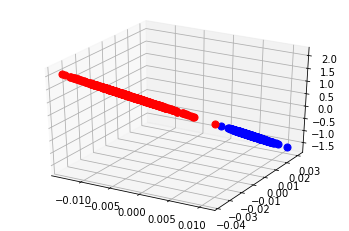

In [274]:
#Projecting onto vecto w
from mpl_toolkits.mplot3d import axes3d
X_1d=[]# Points projected onto one dimension
fig = plt.figure()

ax = fig.gca(projection='3d')
mod_w=np.linalg.norm(W) #mod of w
w2=mod_w ** 2

for i in range(0,len(X)):
    xn = X[i]
    yn=Y[i]
    xn = xn[:,None]
    
    projection = W.T.dot(X[i])   
    point= (projection/w2)* W
    if (yn==0) :
        ax.scatter(point[0],point[1],point[2], s=50,c=color[0])
    elif (yn==1) :
        ax.scatter(point[0],point[1],point[2], s=50,c=color[1])


In [276]:
print(color[0])

blue
